In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns
from IPython.display import Image
import plotly.express as px # ploty
import plotly.graph_objects as go


#한글폰트설정
plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_rows', 100)


#모델
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMClassifier, plot_importance
import lightgbm 


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

pd.options.display.float_format = '{:.2f}'.format


import warnings
warnings.filterwarnings(action='ignore')

import gc, sys
gc.enable() # 자동 가비지 수거 활성화

In [ ]:
# 한글 폰트 확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
!pip uninstall numpy
!pip install numpy==1.20

In [ ]:
!pip install pycaret

In [ ]:
import sklearn
import numpy as np
print(sklearn.__version__, np.__version__)

from pycaret.utils import enable_colab
enable_colab()

0.23.2 1.19.5
Colab mode enabled.


In [ ]:
from pycaret.regression import *

In [ ]:
base_path = '/content/drive/MyDrive/이어드림스쿨/Project/Final_project/2021 농산물 예측대회 AI 경진대회/2021 농산물 가격예측 AI 경진대회/프로젝트 data/'
df = pd.read_parquet(base_path + 'modeling_data1(완).parquet')

# 전품종 AutoML

In [ ]:
def forcast_week(df,week):
    df[f'{week}week']=0
    
    for index in range(len(df)):
        try:df[f'{week}week'][index] = df['mean_price'][index+7*week]
        except:continue
    df_week=df.iloc[-7*week:]
    df = df.drop(df.iloc[-7*week:].index)
    return df, df_week

def automl(pum) :
    apple = df[df.PUM_NM == pum]

    apple = apple.groupby(['SALEDATE']).mean()
    apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
    # df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
    apple = apple.reset_index()
    apple = apple.round()
    apple2, apple2_week = forcast_week(apple, 1)
    display(pum, apple2.head())


    train = apple2[apple2.SALEDATE < '2019-09-22']
    test = apple2[apple2.SALEDATE >= '2019-09-22']
    print(train.shape, test.shape)

    # initialize setup
    s = setup(data = train, 
            test_data = test, 
            data_split_shuffle = False, 
            target = '1week', # target은 1week
            fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
            fold = 3, # 3fold 적용, 1년 단위로 cv 적용
            session_id = 42) # 난수 고정

    print(f'--- {pum} AutoML result! ---')
    
    best = compare_models(sort = 'MAPE')

    predictions = predict_model(best, data=apple2)
    display(predictions.head())

    predictions = predict_model(best, data=apple2)

    # add a date column in the dataset
    # predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

    # line plot
    plt.figure(figsize = (15,10))
    predictions['1week'].plot(label = 'actual')
    predictions['Label'].plot(label = 'predicted', color = 'red')
    plt.title(f'{pum} automl best model / Predicted VS Actual', fontsize = 15)
    plt.legend()
    plt.show()

In [ ]:
for i in df.PUM_NM.unique() :
    automl(i)

안나와서.. 걍 따로따로 돌림

## 사과

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,244.15,125779.32,354.64,0.32,0.16,0.11,0.01
omp,Orthogonal Matching Pursuit,259.32,137060.19,370.16,0.26,0.17,0.12,0.01
en,Elastic Net,255.26,121413.64,345.37,0.38,0.16,0.12,0.02
lightgbm,Light Gradient Boosting Machine,273.35,153802.20,391.34,0.17,0.18,0.13,0.04
rf,Random Forest Regressor,272.55,149328.95,384.75,0.20,0.17,0.13,0.44
gbr,Gradient Boosting Regressor,275.63,161437.65,401.69,0.13,0.18,0.13,0.10
br,Bayesian Ridge,272.94,136513.30,366.98,0.30,0.17,0.13,0.01
huber,Huber Regressor,285.12,152168.82,386.88,0.22,0.18,0.14,0.03
ada,AdaBoost Regressor,300.28,174515.23,416.88,0.04,0.19,0.14,0.07
et,Extra Trees Regressor,303.17,202531.61,447.43,-0.12,0.21,0.14,0.36


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=42, verbose=False)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=42, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,450.00,388778.55,623.52,0.52,0.21,0.17


(314, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1159,2019-09-23,141912.00,155.00,2019.00,9.00,23.00,0.00,1392.00,601.00,535324.00,...,24.00,1.00,92.00,2.00,0.00,0.00,0.00,916.00,1227,1472.07
1160,2019-09-24,151825.00,145.00,2019.00,9.00,24.00,1.00,1392.00,599.00,535324.00,...,35.00,1.00,86.00,0.00,0.00,9.00,0.00,1045.00,1251,1544.08
1161,2019-09-25,197246.00,149.00,2019.00,9.00,25.00,2.00,1394.00,584.00,535324.00,...,32.00,1.00,90.00,0.00,0.00,6.00,0.00,1324.00,1439,1672.23
1162,2019-09-26,158839.00,134.00,2019.00,9.00,26.00,3.00,1395.00,589.00,535324.00,...,32.00,1.00,91.00,0.00,0.00,3.00,0.00,1186.00,1472,1622.87
1163,2019-09-27,157674.00,129.00,2019.00,9.00,27.00,4.00,1396.00,594.00,535324.00,...,36.00,1.00,91.00,0.00,0.00,5.00,0.00,1227.00,1615,1647.71


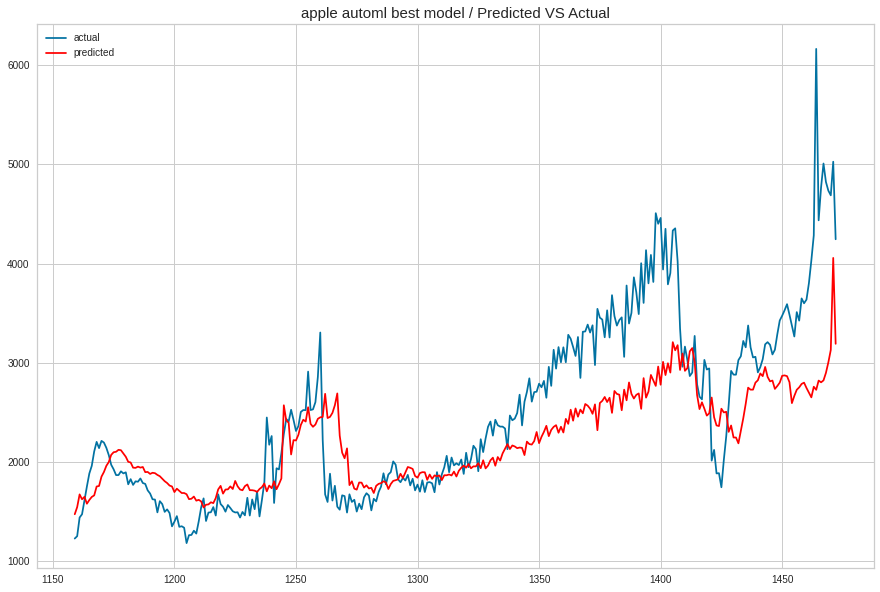

In [ ]:
apple = df[df.PUM_NM == '사과']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- apple AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('apple automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 배추

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,130.86,38819.79,193.44,0.45,0.30,0.22,0.01
rf,Random Forest Regressor,123.51,32018.41,176.58,0.55,0.27,0.23,0.43
lightgbm,Light Gradient Boosting Machine,129.72,32607.42,179.06,0.53,0.29,0.25,0.23
gbr,Gradient Boosting Regressor,133.25,37693.33,192.04,0.46,0.30,0.26,0.12
llar,Lasso Least Angle Regression,144.35,39859.99,198.94,0.42,0.32,0.27,0.95
omp,Orthogonal Matching Pursuit,156.18,46643.98,212.73,0.34,0.35,0.28,0.52
dt,Decision Tree Regressor,173.40,81631.69,274.65,-0.13,0.36,0.30,0.01
et,Extra Trees Regressor,146.29,38295.20,195.40,0.40,0.31,0.30,0.37
en,Elastic Net,190.31,68398.19,255.17,0.05,0.53,0.32,0.02
huber,Huber Regressor,181.00,57420.34,228.87,0.23,0.41,0.36,0.03


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking except

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,135.84,49109.60,221.61,0.59,0.21,0.14


(314, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1159,2019-09-23,1063720.00,705.00,2019.00,9.00,23.00,0.00,1392.00,601.00,1859704.00,...,32.00,2.00,71.00,0.00,0.00,9.00,0.00,1510.00,1512,1195.68
1160,2019-09-24,918140.00,797.00,2019.00,9.00,24.00,1.00,1392.00,599.00,1859704.00,...,32.00,1.00,81.00,0.00,0.00,11.00,0.00,1152.00,1590,995.59
1161,2019-09-25,907471.00,743.00,2019.00,9.00,25.00,2.00,1394.00,584.00,1859704.00,...,31.00,1.00,82.00,0.00,0.00,7.00,0.00,1222.00,1551,1031.53
1162,2019-09-26,892076.00,758.00,2019.00,9.00,26.00,3.00,1395.00,589.00,1859704.00,...,30.00,1.00,85.00,0.00,0.00,8.00,0.00,1176.00,1390,1005.61
1163,2019-09-27,825860.00,701.00,2019.00,9.00,27.00,4.00,1396.00,594.00,1859704.00,...,33.00,2.00,81.00,0.00,0.00,6.00,0.00,1178.00,1134,984.87


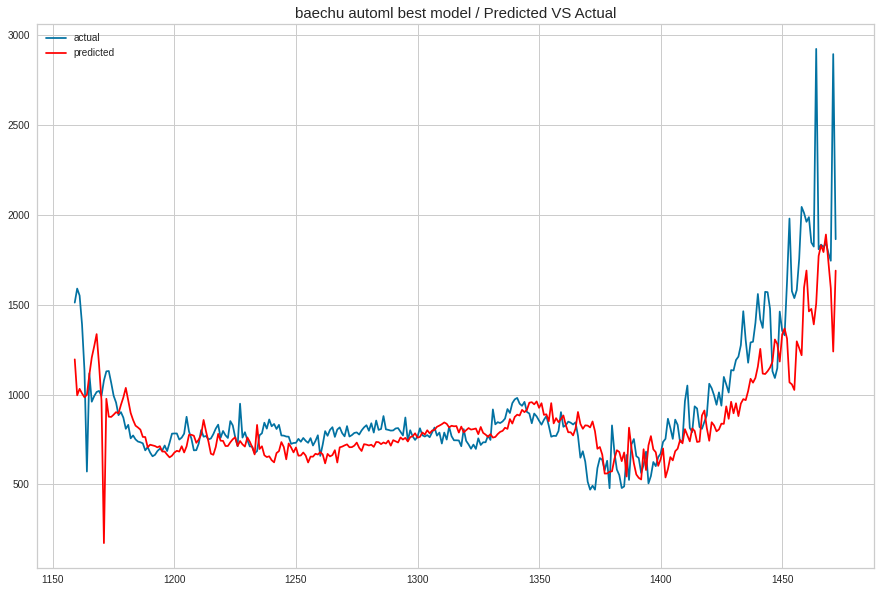

In [ ]:
apple = df[df.PUM_NM == '배추']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- baechu AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('baechu automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 무

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,102.39,17174.92,128.50,0.01,0.24,0.22,0.60
rf,Random Forest Regressor,126.07,24880.24,156.62,-0.74,0.29,0.27,0.44
llar,Lasso Least Angle Regression,119.01,20614.93,142.31,-0.48,0.28,0.27,0.96
lightgbm,Light Gradient Boosting Machine,127.64,26103.24,160.39,-0.89,0.30,0.28,0.24
knn,K Neighbors Regressor,139.41,31728.24,174.95,-0.84,0.32,0.28,0.05
et,Extra Trees Regressor,137.18,28918.50,167.69,-0.91,0.32,0.29,0.37
gbr,Gradient Boosting Regressor,132.13,27283.37,165.14,-1.35,0.32,0.31,0.12
ada,AdaBoost Regressor,143.55,30259.36,173.27,-1.39,0.34,0.33,0.08
br,Bayesian Ridge,147.11,31036.94,171.33,-2.90,0.33,0.35,0.01
par,Passive Aggressive Regressor,163.03,38846.07,193.26,-3.30,0.36,0.37,0.01


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,97.80,18045.02,134.33,0.70,0.20,0.16


(313, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1159,2019-09-23,754575.00,1532.00,2019.00,9.00,23.00,0.00,1392.00,601.00,1110876.00,...,31.00,2.00,73.00,0.00,0.00,4.00,0.00,492.00,736,539.10
1160,2019-09-24,675968.00,1291.00,2019.00,9.00,24.00,1.00,1392.00,599.00,1110876.00,...,34.00,2.00,65.00,0.00,0.00,10.00,0.00,524.00,772,568.90
1161,2019-09-25,678836.00,1410.00,2019.00,9.00,25.00,2.00,1394.00,584.00,1110876.00,...,34.00,3.00,65.00,0.00,0.00,7.00,0.00,481.00,1051,535.45
1162,2019-09-26,588998.00,1294.00,2019.00,9.00,26.00,3.00,1395.00,589.00,1110876.00,...,36.00,4.00,84.00,1.00,0.00,5.00,0.00,455.00,933,516.34
1163,2019-09-27,589969.00,1254.00,2019.00,9.00,27.00,4.00,1396.00,594.00,1110876.00,...,28.00,3.00,94.00,36.00,0.00,0.00,0.00,470.00,893,531.80


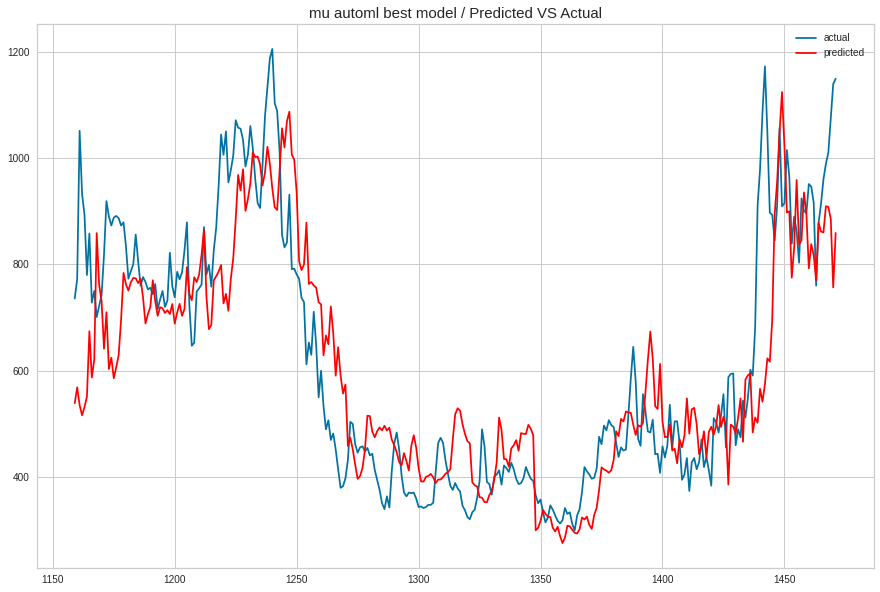

In [ ]:
apple = df[df.PUM_NM == '무']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- mu AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('mu automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 마늘

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,396.31,259399.91,503.43,0.51,0.14,0.11,0.01
llar,Lasso Least Angle Regression,422.89,293827.04,532.65,0.45,0.15,0.12,0.02
ada,AdaBoost Regressor,536.24,419667.58,642.88,0.19,0.18,0.16,0.07
gbr,Gradient Boosting Regressor,551.24,457637.44,671.61,0.11,0.18,0.16,0.10
rf,Random Forest Regressor,575.93,481758.99,692.73,0.06,0.18,0.16,0.41
lightgbm,Light Gradient Boosting Machine,595.17,499340.55,704.22,0.02,0.18,0.17,0.16
huber,Huber Regressor,555.50,531533.60,679.80,0.02,0.19,0.17,0.03
et,Extra Trees Regressor,615.45,568022.27,746.44,-0.10,0.19,0.18,0.34
lasso,Lasso Regression,641.10,686235.43,782.81,-0.25,0.21,0.18,0.04
en,Elastic Net,618.83,649917.19,743.02,-0.19,0.20,0.19,0.02


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,361.32,204833.02,452.58,0.77,0.14,0.12


(310, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1151,2019-09-23,353216.00,128.00,2019.00,9.00,23.00,0.00,1392.00,601.00,387670.00,...,26.00,1.00,78.00,0.00,0.00,0.00,0.00,2763.00,2984,2938.66
1152,2019-09-24,435885.00,143.00,2019.00,9.00,24.00,1.00,1392.00,599.00,387670.00,...,36.00,1.00,75.00,0.00,0.00,10.00,0.00,3039.00,2959,3123.89
1153,2019-09-25,456875.00,192.00,2019.00,9.00,25.00,2.00,1394.00,584.00,387670.00,...,35.00,1.00,75.00,0.00,0.00,7.00,0.00,2385.00,2712,2743.26
1154,2019-09-26,467864.00,172.00,2019.00,9.00,26.00,3.00,1395.00,589.00,387670.00,...,43.00,1.00,72.00,0.00,0.00,7.00,0.00,2719.00,2822,2943.48
1155,2019-09-27,553195.00,218.00,2019.00,9.00,27.00,4.00,1396.00,594.00,387670.00,...,37.00,1.00,83.00,0.00,0.00,3.00,0.00,2537.00,2709,2858.92


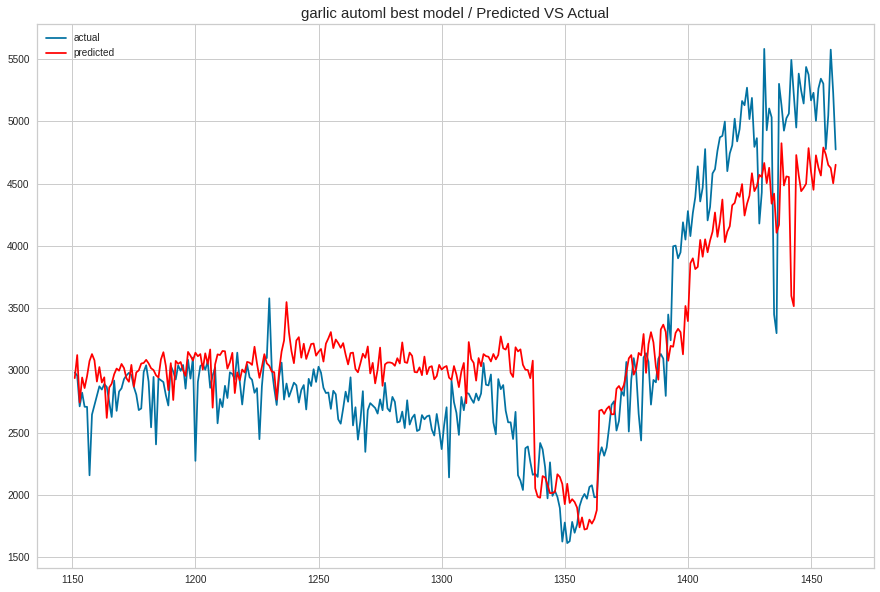

In [ ]:
apple = df[df.PUM_NM == '마늘']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- garlic AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('garlic automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 대파

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,212.93,79401.77,275.22,0.55,0.21,0.17,0.03
lightgbm,Light Gradient Boosting Machine,259.75,126051.85,344.27,0.31,0.25,0.20,0.04
rf,Random Forest Regressor,263.65,121060.95,334.39,0.34,0.24,0.21,0.42
llar,Lasso Least Angle Regression,251.52,102513.78,314.03,0.41,0.24,0.21,0.01
gbr,Gradient Boosting Regressor,267.45,129021.43,347.73,0.29,0.25,0.22,0.11
omp,Orthogonal Matching Pursuit,253.02,103752.27,316.10,0.38,0.24,0.22,0.01
br,Bayesian Ridge,299.05,185511.39,392.30,0.02,0.30,0.22,0.01
en,Elastic Net,300.69,180708.04,392.41,0.04,0.30,0.22,0.02
knn,K Neighbors Regressor,271.39,119044.99,340.62,0.24,0.26,0.23,0.05
dt,Decision Tree Regressor,298.04,149472.80,376.78,0.16,0.30,0.25,0.01


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,211.16,89509.30,299.18,0.59,0.21,0.17


(314, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1158,2019-09-23,888344.00,435.00,2019.00,9.00,23.00,0.00,1392.00,601.00,355931.00,...,30.00,5.00,67.00,0.00,0.00,11.00,0.00,2043.00,1210,1822.55
1159,2019-09-24,666610.00,407.00,2019.00,9.00,24.00,1.00,1392.00,599.00,355931.00,...,30.00,2.00,75.00,0.00,0.00,11.00,0.00,1637.00,1343,1508.16
1160,2019-09-25,562044.00,428.00,2019.00,9.00,25.00,2.00,1394.00,584.00,355931.00,...,29.00,2.00,74.00,0.00,0.00,7.00,0.00,1313.00,1433,1268.09
1161,2019-09-26,498678.00,393.00,2019.00,9.00,26.00,3.00,1395.00,589.00,355931.00,...,30.00,2.00,74.00,0.00,0.00,9.00,0.00,1269.00,1489,1229.77
1162,2019-09-27,480251.00,399.00,2019.00,9.00,27.00,4.00,1396.00,594.00,355931.00,...,31.00,2.00,76.00,0.00,0.00,6.00,0.00,1204.00,1347,1182.82


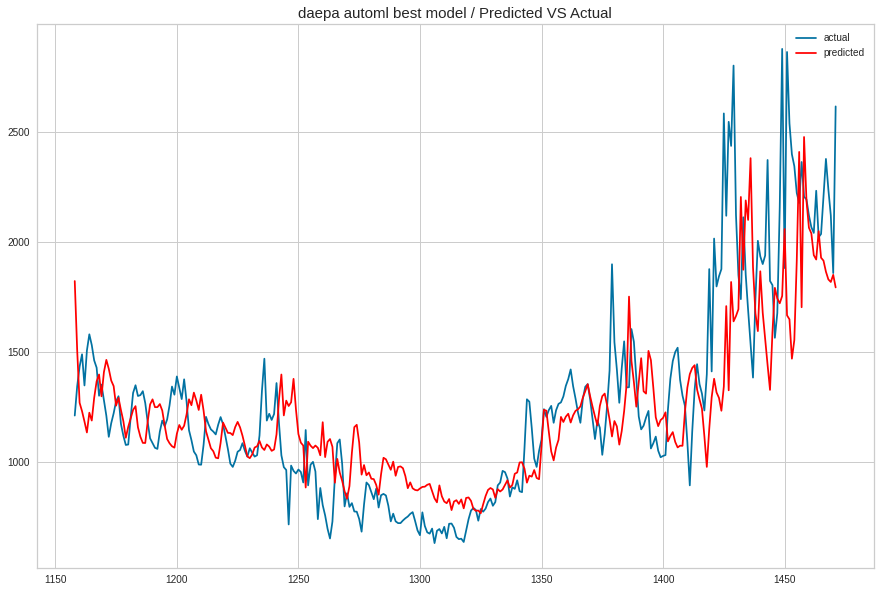

In [ ]:
apple = df[df.PUM_NM == '대파']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- daepa AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('daepa automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 양파

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,97.34,16438.34,122.37,0.37,0.18,0.15,0.01
llar,Lasso Least Angle Regression,99.61,14493.69,119.01,0.33,0.18,0.16,0.01
br,Bayesian Ridge,112.77,19275.29,137.04,0.17,0.24,0.17,0.02
knn,K Neighbors Regressor,117.20,21652.29,144.63,-0.07,0.21,0.18,0.05
rf,Random Forest Regressor,124.79,24230.52,152.94,-0.18,0.23,0.20,0.40
lightgbm,Light Gradient Boosting Machine,135.98,26862.15,163.09,-0.32,0.24,0.22,0.05
dt,Decision Tree Regressor,153.20,36664.54,190.05,-0.68,0.27,0.24,0.02
huber,Huber Regressor,157.41,46859.02,183.31,-0.46,0.24,0.25,0.03
par,Passive Aggressive Regressor,171.45,50053.56,196.62,-0.63,0.26,0.27,0.01
et,Extra Trees Regressor,163.09,37522.74,189.74,-0.56,0.28,0.27,0.34


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,77.57,13529.82,116.32,0.67,0.14,0.10


(315, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1156,2019-09-23,784223.00,1665.00,2019.00,9.00,23.00,0.00,1392.00,601.00,1594452.00,...,30.00,5.00,67.00,0.00,0.00,11.00,0.00,471.00,405,486.76
1157,2019-09-24,742207.00,1655.00,2019.00,9.00,24.00,1.00,1392.00,599.00,1594452.00,...,30.00,2.00,75.00,0.00,0.00,11.00,0.00,448.00,402,468.62
1158,2019-09-25,764423.00,1738.00,2019.00,9.00,25.00,2.00,1394.00,584.00,1594452.00,...,29.00,2.00,74.00,0.00,0.00,7.00,0.00,440.00,409,463.38
1159,2019-09-26,724196.00,1704.00,2019.00,9.00,26.00,3.00,1395.00,589.00,1594452.00,...,30.00,2.00,74.00,0.00,0.00,9.00,0.00,425.00,401,452.11
1160,2019-09-27,736971.00,1810.00,2019.00,9.00,27.00,4.00,1396.00,594.00,1594452.00,...,31.00,2.00,76.00,0.00,0.00,6.00,0.00,407.00,410,438.27


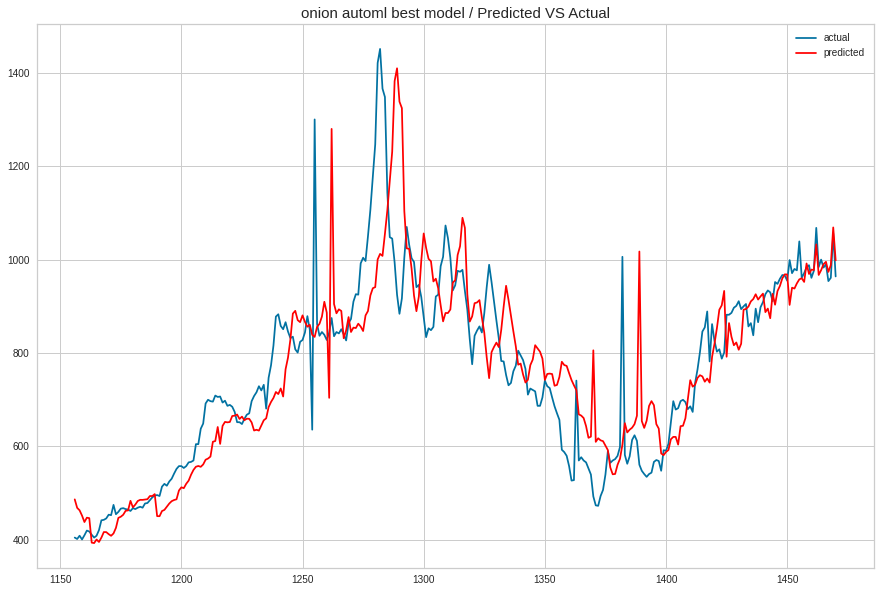

In [ ]:
apple = df[df.PUM_NM == '양파']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- onion AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('onion automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()

## 건고추

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3909.33,51246014.18,7017.58,-0.14,0.50,0.65,0.04
huber,Huber Regressor,3826.82,53770177.06,7204.50,-0.21,0.50,0.71,0.04
ada,AdaBoost Regressor,3559.79,48913368.56,6825.26,-0.07,0.48,0.74,0.08
et,Extra Trees Regressor,3747.12,50264169.50,6960.61,-0.13,0.49,0.76,0.34
dt,Decision Tree Regressor,4649.44,59876915.53,7651.88,-0.39,0.61,0.76,0.02
br,Bayesian Ridge,3715.82,52157771.46,7092.34,-0.18,0.50,0.77,0.02
en,Elastic Net,4849.98,64376800.35,7957.71,-0.53,0.62,0.78,0.02
dummy,Dummy Regressor,4044.91,55933599.76,7392.36,-0.30,0.52,0.79,0.01
llar,Lasso Least Angle Regression,4027.01,53285233.92,7211.98,-0.25,0.52,0.82,0.02
omp,Orthogonal Matching Pursuit,3535.74,48805453.01,6776.05,-0.04,0.48,0.84,0.01


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6840.99,207264063.02,14396.67,-0.22,0.64,0.40


(309, 27)

,SALEDATE,TOT_AMT,TOT_QTY,year,month,day,weekday,domestic_mean,abroad_mean,output,...,지면온도(최고),풍속(m/s)(평균),습도(%)(평균),강수량(mm)(합계),적설량(cm)(합계),일조량(합계),일조량(평균),mean_price,1week,Label
1142,2019-09-23,781807.00,47.00,2019.00,9.00,23.00,0.00,1392.00,601.00,78438.00,...,31.00,2.00,60.00,0.00,0.00,6.00,0.00,16638.00,11793,13719.07
1143,2019-09-24,451994.00,37.00,2019.00,9.00,24.00,1.00,1392.00,599.00,78438.00,...,33.00,1.00,72.00,0.00,0.00,7.00,0.00,12057.00,12817,11096.07
1144,2019-09-25,524802.00,47.00,2019.00,9.00,25.00,2.00,1394.00,584.00,78438.00,...,32.00,1.00,48.00,0.00,0.00,5.00,0.00,11058.00,33070,12029.43
1145,2019-09-26,455752.00,36.00,2019.00,9.00,26.00,3.00,1395.00,589.00,78438.00,...,32.00,1.00,82.00,0.00,0.00,5.00,0.00,12662.00,12524,8755.51
1146,2019-09-27,383173.00,31.00,2019.00,9.00,27.00,4.00,1396.00,594.00,78438.00,...,30.00,1.00,59.00,0.00,0.00,3.00,0.00,12484.00,9096,11002.11


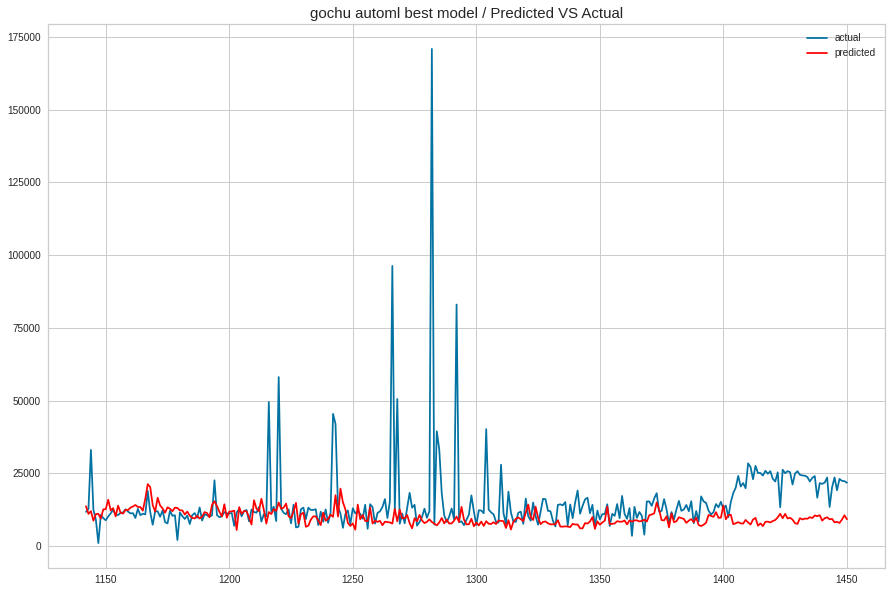

In [ ]:
apple = df[df.PUM_NM == '건고추']

apple = apple.groupby(['SALEDATE']).mean()
apple['mean_price']=apple['TOT_AMT']/apple['TOT_QTY']
# df_apple=df_apple.drop(columns=['TOT_AMT','TOT_QTY'])
apple = apple.reset_index()
apple = apple.round()
apple2, apple2_week = forcast_week(apple, 1)
display(apple2.head())


train = apple2[apple2.SALEDATE < '2019-09-22']
test = apple2[apple2.SALEDATE >= '2019-09-22']
print(train.shape, test.shape)

# initialize setup
s = setup(data = train, 
        test_data = test, 
        data_split_shuffle = False, 
        target = '1week', # target은 1week
        fold_strategy = 'timeseries', # 교차검증 timeseries 방법으로
        fold = 3, # 3fold 적용, 1년 단위로 cv 적용
        session_id = 42) # 난수 고정

print(f'--- gochu AutoML result! ---')

best = compare_models(sort = 'MAPE')

predictions = predict_model(best, data=test)
display(predictions.shape, predictions.head())

# add a date column in the dataset
# predictions['SALEDATE'] = pd.date_range(start='2019-09-22', end = '2020-09-21', freq = 'MS')

# line plot
plt.figure(figsize = (15,10))
predictions['1week'].plot(label = 'actual')
predictions['Label'].plot(label = 'predicted', color = 'red')
plt.title('gochu automl best model / Predicted VS Actual', fontsize = 15)
plt.legend()
plt.show()